# Last.fm
Navigate **rodrigodub** scrobbling history

2020.08.14

CSV file generated by [Last.fm to csv](https://benjaminbenben.com/lastfm-to-csv/) ([GitHub](https://github.com/benfoxall/lastfm-to-csv))

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import os

## Define Functions

In [3]:
def loaddata(filename):
    df = pd.read_csv(filename, header=None, names=['rawartist', 'album', 'track', 'date'])
    df['date'] = df['date'].apply(lambda x:datetime.datetime.strptime(x, '%d %b %Y %H:%M'))
    return df

In [4]:
def summarisecolumn(dataframe, columnname, threshold):
    """Counts unique values of 'columnname', converts Pandas Series to Dataframe,
       and returns only values greater than threshold."""
    df = dataframe[columnname].value_counts()
    df = df.to_frame()
    df = df.reset_index()
    df.columns = ['value', 'count']
    df = df[df['count'] >= threshold]
    return df

In [5]:
def drawbarchart(dataframe, title):
    """Draw bar chart"""
    # Make a fake dataset:
    height = dataframe['count']
    bars = dataframe['value']
    y_pos = np.arange(len(bars))

    # Create bars
    plt.bar(y_pos, height)

    # Create names on the x-axis
    plt.xticks(y_pos, bars, rotation=90)
    
    # Make figure wider
    #plt.figure(figsize=(12,5))
    #plt.figure(figsize=(800/mydpi, 600/mydpi), dpi=mydpi)
    
    # Titles
    plt.title(title)
    #plt.xlabel('categories')
    plt.ylabel('Play count')

    # Show graphic
    plt.show()

In [6]:
def daterange(dataframe, fromdate, todate):
    """fromdate and todate in the form of integer YYYYMMDD"""
    df = dataframe
    fd = datetime.datetime.strptime(str(fromdate), '%Y%m%d')
    td = datetime.datetime.strptime(str(todate), '%Y%m%d')
    df = df[df['date'] >= fd]
    df = df[df['date'] < td]
    return df

In [7]:
def consolidateartist(dataframe, artistdict):
    dataframe['artist'] = dataframe['rawartist'].apply(lambda x:artistdict[x] if x in artistdict.keys() else x)
    return dataframe

In [8]:
consolidateddict = {'Quantic Presenta Flowering Inferno': 'Quantic', 'The Quantic Soul Orchestra': 'Quantic'
                    , 'Clutchy Hopkins Meets Lord Kenjamin': 'Clutchy Hopkins', 'Los Sebosos Postizos': 'Nação Zumbi'
                    , 'Ben Harper & The Innocent Criminals': 'Ben Harper', 'Chico Science & Nação Zumbi': 'Nação Zumbi'
                    , 'Madvillain': 'MF DOOM', 'Mulatu Astatke & The Heliocentrics': 'The Heliocentrics'
                    , 'Jaylib': 'Madlib', 'Neil Young & Crazy Horse': 'Neil Young', 'Lucas Santtana e Seleção Natural': 'Lucas Santtana'
                    , 'J.Period John Legend & The Roots': 'The Roots', "Shawn Lee's Ping Pong Orchestra": 'Shawn Lee'
                    , 'Rocket Juice & The Moon': 'Damon Albarn', 'Gorillaz': 'Damon Albarn', 'The Good the Bad & the Queen': 'Damon Albarn'
                    , 'The Limp Twins': 'Quantic', 'Shawn Lee & Clutchy Hopkins': 'Clutchy Hopkins', 'Danger Mouse & Daniele Luppi': 'Danger Mouse'
                    , 'Broken Bells': 'Danger Mouse', 'The Jimi Hendrix Experience': 'Jimi Hendrix', 'Danger Doom': 'MF DOOM'
                    , 'Danger Mouse & Sparklehorse': 'Danger Mouse', 'Lord Newborn & the Magic Skulls': 'Shawn Lee'
                    , 'Quantic and his Combo Barbaro': 'Quantic', 'AM & Shawn Lee': 'Shawn Lee', 'Russo Passapusso': 'BaianaSystem'
                    , 'Baiana System': 'BaianaSystem', 'Omar Rodriguez-Lopez': 'Omar Rodríguez-López', 'The Mars Volta': 'Omar Rodríguez-López'
                    , 'Spanky Wilson & The Quantic Soul Orchestra': 'Quantic', 'Fela Ransome Kuti & Nigeria 70': 'Fela Kuti', 'Grinderman': 'Nick Cave'
                    , 'Nick Cave and the Bad Seeds': 'Nick Cave', 'Quantic and his Combo Bárbaro': 'Quantic'
                    , 'Ben Harper And The Blind Boys Of Alabama': 'Ben Harper', 'Doom': 'MF DOOM', 'Horace Andy & Alpha': 'Horace Andy'
                    , 'Lee Fields & The Expressions': 'Lee Fields', 'Rita Lee & Tutti Frutti': 'Rita Lee'
                    , 'Sun Araw and M. Geddes Gengras Meet The Congos': 'Sun Araw', 'Mad Professor & Jah Shaka': 'Mad Professor', 'The RZA': 'RZA'
                    , 'King Tubby Meets The Scientist': 'King Tubby', 'KING TUBBY MEETS THE UPSETTERS': 'Lee Scratch Perry'
                    , 'King Tubby meets Lee Perry': 'Lee Scratch Perry', 'King Tubby and the Aggrovators': 'King Tubby', 'King Tubby & Friends': 'King Tubby'
                    , 'Yesterdays New Quintet': 'Madlib', 'Freddie Gibbs': 'Madlib', 'Quasimoto': 'Madlib', 'Lee Scratch Perry & Dub Syndicate': 'Lee Scratch Perry'
                    , 'Lee Scratch Perry & Soul Syndicate': 'Lee Scratch Perry', 'The Orb featuring Lee Scratch Perry': 'Lee Scratch Perry'
                    , 'Lee Scratch Perry & The Upsetters': 'Lee Scratch Perry', 'lee scratch perry & the upsetters': 'Lee Scratch Perry'
                    , 'lee scratch perry & mad professor': 'Lee Scratch Perry', 'The Upsetters': 'Lee Scratch Perry'
                    , 'Max Romeo & The Upsetters': 'Lee Scratch Perry', 'Upsetters': 'Lee Scratch Perry', 'Lee Perry & The Upsetters': 'Lee Scratch Perry'
                    , 'The Upsetters Revue Feat. Junior Murvin': 'Lee Scratch Perry', 'augustus pablo meets the upsetter': 'Lee Scratch Perry'
                    , 'PJ Harvey & John Parish': 'PJ Harvey', 'MF Doom vs. Mos Def': 'MF DOOM', 'El Michaels Affair': 'El Michels Affair'
                    , 'Antibalas Afrobeat Orchestra': 'Antibalas', 'Ben Harper and Relentless7': 'Ben Harper', 'Bob Dylan & The Band': 'Bob Dylan'
                    , 'Jon Spencer Blues Explosion': 'The Jon Spencer Blues Explosion', 'Clutchy Hopkins And Misled Children': 'Clutchy Hopkins'
                    , 'Fela and Africa 70': 'Fela Kuti', 'Quantic Y Su Conjunto Los Míticos Del Ritmo': 'Quantic'
                    , 'Lloyd Miller & The Heliocentrics': 'The Heliocentrics', 'Gorillaz & Spacemonkeyz': 'Damon Albarn', 'Fela Ransome Kuti': 'Fela Kuti'
                    , 'Public Image Limited': 'Public Image Ltd.', 'Heliocentrics': 'The Heliocentrics', 'Black Alien & Speed Freaks': 'Black Alien'
                    , 'Kelan Philip Cohran & The Hypnotic Brass Ensemble': 'Hypnotic Brass Ensemble', 'Mutantes': 'Os Mutantes'
                    , 'BNegão & Os Seletores de Frequência': 'BNegão & Seletores de Frequência'
                    , 'BNegão & Seletores de Frequencia': 'BNegão & Seletores de Frequência', 'BNegão': 'BNegão & Seletores de Frequência'
                    , 'bnegão e os seletores de frequência': 'BNegão & Seletores de Frequência', 'Quantic & Alice Russell with the Combo Bárbaro': 'Quantic'
                    , 'Fela and Afrika 70': 'Fela Kuti'}

## Load dataset

In [9]:
scrobblepath = '/Users/rodrigo/Google Drive/AIDSML/Datasets/20200814 Last.fm'
scrobblefile = 'rodrigodub 20200814.csv'

In [10]:
rawdata = loaddata(os.path.join(scrobblepath, scrobblefile))

In [11]:
rawdata

,rawartist,album,track,date
0,MF DOOM,MM...FOOD,Hoe Cakes,2020-08-13 10:33:00
1,MF DOOM,Special Herbs + Spices Volume One,Outro - Fat Man Scoop,2020-08-13 10:32:00
2,MF DOOM,Metal Fingers Presents: Special Herbs The Box ...,Eucalyptus,2020-08-13 10:30:00
3,MF DOOM,Born Like This,Thank Ya,2020-08-13 10:29:00
4,MF DOOM,Metal Fingers Presents: Special Herbs The Box ...,Burdock Root,2020-08-13 10:27:00
...,...,...,...,...
114211,Ben Harper,Burn To Shine,Suzie Blue,2006-05-30 17:37:00
114212,Mombojó,NaN,Cabidela,2006-05-30 17:33:00
114213,Lucas Santtana e Seleção Natural,NaN,Awô dub,2006-05-30 17:25:00
114214,Gnarls Barkley,St. Elsewhere,St. Elsewhere,2006-05-30 17:16:00


In [ ]:
rawdata.info()

## Top Artists Overall

In [14]:
topartists = summarisecolumn(rawdata, 'rawartist', 600)
topartists

,value,count
0,Céu,1564
1,Flying Lotus,1445
2,Curumin,1322
3,The Budos Band,1184
4,Radiohead,1140
5,The Beatles,1047
6,Beastie Boys,1047
7,Sonic Youth,943
8,Thievery Corporation,940
9,Bob Dylan,897


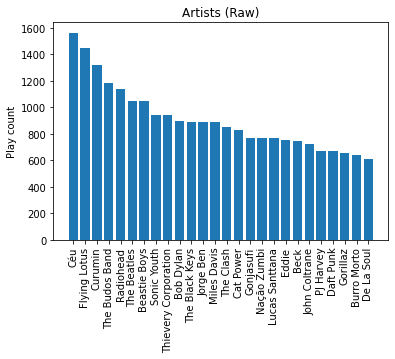

In [15]:
drawbarchart(topartists, 'Artists (Raw)')

## Filter by date range

In [ ]:
s2020 = daterange(rawdata, 20200101, 20210101)
top2020 = summarisecolumn(s2020, 'rawartist', 4)
top2020

In [ ]:
drawbarchart(top2020, '2020 Artists')

## Consolidate Artists

In [ ]:
pd.set_option('display.max_rows', None)
# pd.set_option('display.max_rows', 20)

In [16]:
newdata = consolidateartist(rawdata, consolidateddict)

In [17]:
newdata

,rawartist,album,track,date,artist
0,MF DOOM,MM...FOOD,Hoe Cakes,2020-08-13 10:33:00,MF DOOM
1,MF DOOM,Special Herbs + Spices Volume One,Outro - Fat Man Scoop,2020-08-13 10:32:00,MF DOOM
2,MF DOOM,Metal Fingers Presents: Special Herbs The Box ...,Eucalyptus,2020-08-13 10:30:00,MF DOOM
3,MF DOOM,Born Like This,Thank Ya,2020-08-13 10:29:00,MF DOOM
4,MF DOOM,Metal Fingers Presents: Special Herbs The Box ...,Burdock Root,2020-08-13 10:27:00,MF DOOM
...,...,...,...,...,...
114211,Ben Harper,Burn To Shine,Suzie Blue,2006-05-30 17:37:00,Ben Harper
114212,Mombojó,NaN,Cabidela,2006-05-30 17:33:00,Mombojó
114213,Lucas Santtana e Seleção Natural,NaN,Awô dub,2006-05-30 17:25:00,Lucas Santtana
114214,Gnarls Barkley,St. Elsewhere,St. Elsewhere,2006-05-30 17:16:00,Gnarls Barkley


In [18]:
aggregatedartists = summarisecolumn(newdata, 'artist', 600)
aggregatedartists

,value,count
0,Quantic,2156
1,Céu,1564
2,Nação Zumbi,1482
3,Flying Lotus,1445
4,Curumin,1322
5,The Budos Band,1184
6,Clutchy Hopkins,1149
7,Radiohead,1140
8,MF DOOM,1092
9,Beastie Boys,1047


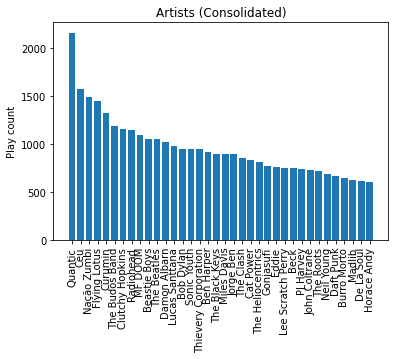

In [19]:
drawbarchart(aggregatedartists, 'Artists (Consolidated)')

In [ ]:
# DEVDICT

In [ ]:
consolidateddict = {'Quantic Presenta Flowering Inferno': 'Quantic', 'The Quantic Soul Orchestra': 'Quantic'
                    , 'Clutchy Hopkins Meets Lord Kenjamin': 'Clutchy Hopkins', 'Los Sebosos Postizos': 'Nação Zumbi'
                    , 'Ben Harper & The Innocent Criminals': 'Ben Harper', 'Chico Science & Nação Zumbi': 'Nação Zumbi'
                    , 'Madvillain': 'MF DOOM', 'Mulatu Astatke & The Heliocentrics': 'The Heliocentrics'
                    , 'Jaylib': 'Madlib', 'Neil Young & Crazy Horse': 'Neil Young', 'Lucas Santtana e Seleção Natural': 'Lucas Santtana'
                    , 'J.Period John Legend & The Roots': 'The Roots', "Shawn Lee's Ping Pong Orchestra": 'Shawn Lee'
                    , 'Rocket Juice & The Moon': 'Damon Albarn', 'Gorillaz': 'Damon Albarn', 'The Good the Bad & the Queen': 'Damon Albarn'
                    , 'The Limp Twins': 'Quantic', 'Shawn Lee & Clutchy Hopkins': 'Clutchy Hopkins', 'Danger Mouse & Daniele Luppi': 'Danger Mouse'
                    , 'Broken Bells': 'Danger Mouse', 'The Jimi Hendrix Experience': 'Jimi Hendrix', 'Danger Doom': 'MF DOOM'
                    , 'Danger Mouse & Sparklehorse': 'Danger Mouse', 'Lord Newborn & the Magic Skulls': 'Shawn Lee'
                    , 'Quantic and his Combo Barbaro': 'Quantic', 'AM & Shawn Lee': 'Shawn Lee', 'Russo Passapusso': 'BaianaSystem'
                    , 'Baiana System': 'BaianaSystem', 'Omar Rodriguez-Lopez': 'Omar Rodríguez-López', 'The Mars Volta': 'Omar Rodríguez-López'
                    , 'Spanky Wilson & The Quantic Soul Orchestra': 'Quantic', 'Fela Ransome Kuti & Nigeria 70': 'Fela Kuti', 'Grinderman': 'Nick Cave'
                    , 'Nick Cave and the Bad Seeds': 'Nick Cave', 'Quantic and his Combo Bárbaro': 'Quantic'
                    , 'Ben Harper And The Blind Boys Of Alabama': 'Ben Harper', 'Doom': 'MF DOOM', 'Horace Andy & Alpha': 'Horace Andy'
                    , 'Lee Fields & The Expressions': 'Lee Fields', 'Rita Lee & Tutti Frutti': 'Rita Lee'
                    , 'Sun Araw and M. Geddes Gengras Meet The Congos': 'Sun Araw', 'Mad Professor & Jah Shaka': 'Mad Professor', 'The RZA': 'RZA'
                    , 'King Tubby Meets The Scientist': 'King Tubby', 'KING TUBBY MEETS THE UPSETTERS': 'Lee Scratch Perry'
                    , 'King Tubby meets Lee Perry': 'Lee Scratch Perry', 'King Tubby and the Aggrovators': 'King Tubby', 'King Tubby & Friends': 'King Tubby'
                    , 'Yesterdays New Quintet': 'Madlib', 'Freddie Gibbs': 'Madlib', 'Quasimoto': 'Madlib', 'Lee Scratch Perry & Dub Syndicate': 'Lee Scratch Perry'
                    , 'Lee Scratch Perry & Soul Syndicate': 'Lee Scratch Perry', 'The Orb featuring Lee Scratch Perry': 'Lee Scratch Perry'
                    , 'Lee Scratch Perry & The Upsetters': 'Lee Scratch Perry', 'lee scratch perry & the upsetters': 'Lee Scratch Perry'
                    , 'lee scratch perry & mad professor': 'Lee Scratch Perry', 'The Upsetters': 'Lee Scratch Perry'
                    , 'Max Romeo & The Upsetters': 'Lee Scratch Perry', 'Upsetters': 'Lee Scratch Perry', 'Lee Perry & The Upsetters': 'Lee Scratch Perry'
                    , 'The Upsetters Revue Feat. Junior Murvin': 'Lee Scratch Perry', 'augustus pablo meets the upsetter': 'Lee Scratch Perry'
                    , 'PJ Harvey & John Parish': 'PJ Harvey', 'MF Doom vs. Mos Def': 'MF DOOM', 'El Michaels Affair': 'El Michels Affair'
                    , 'Antibalas Afrobeat Orchestra': 'Antibalas', 'Ben Harper and Relentless7': 'Ben Harper', 'Bob Dylan & The Band': 'Bob Dylan'
                    , 'Jon Spencer Blues Explosion': 'The Jon Spencer Blues Explosion', 'Clutchy Hopkins And Misled Children': 'Clutchy Hopkins'
                    , 'Fela and Africa 70': 'Fela Kuti', 'Quantic Y Su Conjunto Los Míticos Del Ritmo': 'Quantic'
                    , 'Lloyd Miller & The Heliocentrics': 'The Heliocentrics', 'Gorillaz & Spacemonkeyz': 'Damon Albarn', 'Fela Ransome Kuti': 'Fela Kuti'
                    , 'Public Image Limited': 'Public Image Ltd.', 'Heliocentrics': 'The Heliocentrics', 'Black Alien & Speed Freaks': 'Black Alien'
                    , 'Kelan Philip Cohran & The Hypnotic Brass Ensemble': 'Hypnotic Brass Ensemble', 'Mutantes': 'Os Mutantes'
                    , 'BNegão & Os Seletores de Frequência': 'BNegão & Seletores de Frequência'
                    , 'BNegão & Seletores de Frequencia': 'BNegão & Seletores de Frequência', 'BNegão': 'BNegão & Seletores de Frequência'
                    , 'bnegão e os seletores de frequência': 'BNegão & Seletores de Frequência', 'Quantic & Alice Russell with the Combo Bárbaro': 'Quantic'
                    , 'Fela and Afrika 70': 'Fela Kuti'}

In [ ]:
# DEV
topartists[590:]

In [ ]:
consolidateddict['Quantic Presenta Flowering Inferno']

In [ ]:
consolidateddict.keys()

In [ ]:
rawdata['artist'] = rawdata['rawartist'].apply(lambda x:consolidateddict[x] if x in consolidateddict.keys() else x)

In [ ]:
topartistsagg = summarisecolumn(rawdata, 'artist', 600)
topartistsagg

## References
- [CSV without header](https://stackoverflow.com/questions/28382735/python-pandas-does-not-read-the-first-row-of-csv-file)
- [value_counts()](https://stackoverflow.com/questions/45759966/counting-unique-values-in-a-column-in-pandas-dataframe-like-in-qlik/45760042)
- [Series to Dataframe](https://stackoverflow.com/questions/26097916/convert-pandas-series-to-dataframe)
- [Index to Column](https://stackoverflow.com/questions/20461165/how-to-convert-index-of-a-pandas-dataframe-into-a-column) (reset_index() solved it)
- [Renaming dataframe columns](https://stackoverflow.com/questions/11346283/renaming-columns-in-pandas)
- Draw Bar Chart [[1]](https://pythonspot.com/matplotlib-bar-chart/), [[2]](https://python-graph-gallery.com/1-basic-barplot/), [[3]](https://python-graph-gallery.com/7-custom-barplot-layout/), [[4]](https://python-graph-gallery.com/4-add-title-and-axis-label/)
- [Display full dataframe](https://thispointer.com/python-pandas-how-to-display-full-dataframe-i-e-print-all-rows-columns-without-truncation/)